In [18]:
import pandas as po
import numpy as np
import matplotlib.pyplot as plt

In [19]:
# read mushra.csv by pandas
df = po.read_csv('mushra.csv')
df

,session_test_id,session_uuid,trial_id,rating_stimulus,rating_score,rating_time,rating_comment
0,pitch_shift,c73f6906-aecb-4172-925d-87589f490437,training,PS,23,82364,NaN
1,pitch_shift,c73f6906-aecb-4172-925d-87589f490437,training,SS,39,82364,NaN
2,pitch_shift,c73f6906-aecb-4172-925d-87589f490437,training,WS,69,82364,NaN
3,pitch_shift,c73f6906-aecb-4172-925d-87589f490437,training,AN,13,82364,NaN
4,pitch_shift,c73f6906-aecb-4172-925d-87589f490437,training,EL,77,82364,NaN
...,...,...,...,...,...,...,...
275,pitch_shift,e40772cd-016d-456e-aa5f-05fd7aade0c3,guitar_round,AN,5,81771,NaN
276,pitch_shift,e40772cd-016d-456e-aa5f-05fd7aade0c3,guitar_round,WS,90,81771,NaN
277,pitch_shift,e40772cd-016d-456e-aa5f-05fd7aade0c3,guitar_round,EL,60,81771,NaN
278,pitch_shift,e40772cd-016d-456e-aa5f-05fd7aade0c3,guitar_round,SS,20,81771,NaN


In [20]:
# delete record with trial_id == "training"
df = df[df['trial_id'] != 'training']

# delete columns except for "trial_id", "rating_stimulus", "rating_score"
df = df[['trial_id', 'rating_stimulus', 'rating_score']]

df

,trial_id,rating_stimulus,rating_score
5,mix_min_12,EL,21
6,mix_min_12,PS,44
7,mix_min_12,WS,59
8,mix_min_12,AN,7
9,mix_min_12,SS,76
...,...,...,...
275,guitar_round,AN,5
276,guitar_round,WS,90
277,guitar_round,EL,60
278,guitar_round,SS,20


In [21]:
# map rating score from 0-100 to 1-5 MOS scale
df['rating_score'] = df['rating_score'].map(lambda x: (x/100)*4+1)
df

,trial_id,rating_stimulus,rating_score
5,mix_min_12,EL,1.84
6,mix_min_12,PS,2.76
7,mix_min_12,WS,3.36
8,mix_min_12,AN,1.28
9,mix_min_12,SS,4.04
...,...,...,...
275,guitar_round,AN,1.20
276,guitar_round,WS,4.60
277,guitar_round,EL,3.40
278,guitar_round,SS,1.80


In [22]:
# group by "trial_id" and "rating_stimulus" and then caluculate mean and standard deviation of "rating_score"
df_grouped = df.groupby(['trial_id', 'rating_stimulus']).agg([np.mean, np.std])
df_grouped  

/var/folders/9b/646lmqp56b53pz1fqqr9x5gw0000gn/T/ipykernel_67168/3710937881.py:2: FutureWarning: The provided callable <function mean at 0x1082a4180> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  df_grouped = df.groupby(['trial_id', 'rating_stimulus']).agg([np.mean, np.std])
/var/folders/9b/646lmqp56b53pz1fqqr9x5gw0000gn/T/ipykernel_67168/3710937881.py:2: FutureWarning: The provided callable <function std at 0x1082a42c0> is currently using SeriesGroupBy.std. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "std" instead.
  df_grouped = df.groupby(['trial_id', 'rating_stimulus']).agg([np.mean, np.std])


rating_score          
                                     mean       std
trial_id     rating_stimulus                       
drums_round  AN                     2.020  1.031836
             EL                     4.195  0.484473
             PS                     2.895  0.797980
             SS                     3.670  0.690093
             WS                     3.370  0.717376
guitar_round AN                     1.300  0.199428
             EL                     4.075  0.486357
             PS                     3.385  0.425978
             SS                     2.545  0.976042
             WS                     4.510  0.422104
mix_min_12   AN                     1.185  0.173617
             EL                     2.710  1.042141
             PS                     2.295  0.421121
             SS                     3.470  0.798785
             WS                     3.460  0.925573
mix_plus_12  AN                     1.225  0.365318
             EL                     3.105  1.080727
             PS                     2.180  0.576095
             SS                     2.465  0.439708
             WS                     3.305  0.813862
mix_plus_7   AN                     1.280  0.312776
             EL                     3.605  0.567878
             PS                     2.200  0.389579
             SS                     2.960  0.564472
             WS                     3.840  0.465495
mix_round    AN                     1.285  0.306454
             EL                     2.875  1.013833
             PS                     2.155  0.558953
             SS                     4.085  0.795541
             WS                     3.855  0.407887

In [23]:
# trail id mapping dict
trial_id_mapping = {
    'mix_plus_12': 'Mix +12',
    'mix_plus_7': 'Mix +7',
    'mix_min_12': 'Mix -12',
    'mix_round': 'Mix Round Trip Up',
    'drums_round': 'Drums Round Trip Up',
    'guitar_round': 'Guitar Round Trip Up',
}
# map trial_id to their respective names
df_grouped = df_grouped.rename(index=trial_id_mapping)
df_grouped


rating_score          
                                             mean       std
trial_id             rating_stimulus                       
Drums Round Trip Up  AN                     2.020  1.031836
                     EL                     4.195  0.484473
                     PS                     2.895  0.797980
                     SS                     3.670  0.690093
                     WS                     3.370  0.717376
Guitar Round Trip Up AN                     1.300  0.199428
                     EL                     4.075  0.486357
                     PS                     3.385  0.425978
                     SS                     2.545  0.976042
                     WS                     4.510  0.422104
Mix -12              AN                     1.185  0.173617
                     EL                     2.710  1.042141
                     PS                     2.295  0.421121
                     SS                     3.470  0.798785
                     WS                     3.460  0.925573
Mix +12              AN                     1.225  0.365318
                     EL                     3.105  1.080727
                     PS                     2.180  0.576095
                     SS                     2.465  0.439708
                     WS                     3.305  0.813862
Mix +7               AN                     1.280  0.312776
                     EL                     3.605  0.567878
                     PS                     2.200  0.389579
                     SS                     2.960  0.564472
                     WS                     3.840  0.465495
Mix Round Trip Up    AN                     1.285  0.306454
                     EL                     2.875  1.013833
                     PS                     2.155  0.558953
                     SS                     4.085  0.795541
                     WS                     3.855  0.407887

In [24]:
# sort alphabetically by the following order: mix -12, mix +7, mix +12, mix round trip up, drums, guitar, 
df_grouped = df_grouped.reindex(['Mix -12', 'Mix +7', 'Mix +12', 'Mix Round Trip Up', 'Drums Round Trip Up', 'Guitar Round Trip Up'], level=0)
# df_grouped = df_grouped.sort_index()
df_grouped

rating_score          
                                             mean       std
trial_id             rating_stimulus                       
Mix -12              AN                     1.185  0.173617
                     EL                     2.710  1.042141
                     PS                     2.295  0.421121
                     SS                     3.470  0.798785
                     WS                     3.460  0.925573
Mix +7               AN                     1.280  0.312776
                     EL                     3.605  0.567878
                     PS                     2.200  0.389579
                     SS                     2.960  0.564472
                     WS                     3.840  0.465495
Mix +12              AN                     1.225  0.365318
                     EL                     3.105  1.080727
                     PS                     2.180  0.576095
                     SS                     2.465  0.439708
                     WS                     3.305  0.813862
Mix Round Trip Up    AN                     1.285  0.306454
                     EL                     2.875  1.013833
                     PS                     2.155  0.558953
                     SS                     4.085  0.795541
                     WS                     3.855  0.407887
Drums Round Trip Up  AN                     2.020  1.031836
                     EL                     4.195  0.484473
                     PS                     2.895  0.797980
                     SS                     3.670  0.690093
                     WS                     3.370  0.717376
Guitar Round Trip Up AN                     1.300  0.199428
                     EL                     4.075  0.486357
                     PS                     3.385  0.425978
                     SS                     2.545  0.976042
                     WS                     4.510  0.422104

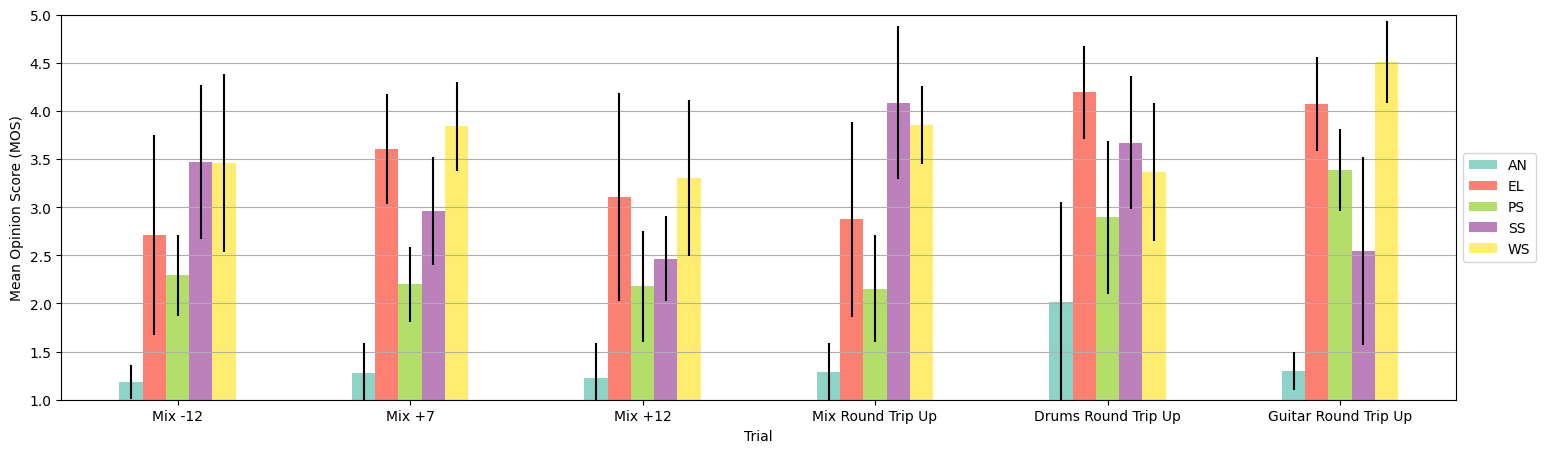

In [25]:
# plot the result with separate an error bar for each stimulus
fig, ax = plt.subplots()
fig.set_size_inches(18, 5) # set size to 18x5
df_grouped['rating_score'].unstack().plot(kind='bar', y='mean', yerr='std', ax=ax, colormap='Set3')
ax.yaxis.grid(True) # add horizontal grid lines
ax.set_xlabel('Trial')
ax.set_ylabel('Mean Opinion Score (MOS)')
ax.set_xticklabels(ax.get_xticklabels(), rotation=0) # set x labels to be written horizontally
ax.set_ylim(1, 5) # set y value range from 1 to 5
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5)) # show legend outside of the plot on the right side
plt.show()

In [26]:
from scipy.stats import wilcoxon

# Get unique stimuli excluding 'PS'
unique_stimuli = df['rating_stimulus'].unique()
unique_stimuli = unique_stimuli[unique_stimuli != 'PS']

# Perform the Wilcoxon signed-rank test for 'PS' against each unique stimulus
results = {}
for stimulus in unique_stimuli:
    stimulus_scores = df[df['rating_stimulus'] == stimulus]['rating_score']
    ps_scores = df[df['rating_stimulus'] == 'PS']['rating_score']
    stat, p_value = wilcoxon(ps_scores, stimulus_scores, alternative='less')
    results[stimulus] = {'stat': stat, 'p_value': p_value}

# Print the results
for stimulus, result in results.items():
    print(f'Wilcoxon signed-rank test pairing PS with {stimulus}:')
    print(f'  Statistic: {result["stat"]}')
    print(f'  p-value: {result["p_value"]}\n')

Wilcoxon signed-rank test pairing PS with EL:
  Statistic: 74.0
  p-value: 2.7718975915671823e-07

Wilcoxon signed-rank test pairing PS with WS:
  Statistic: 21.0
  p-value: 1.588063014423824e-12

Wilcoxon signed-rank test pairing PS with AN:
  Statistic: 1035.0
  p-value: 0.9999999974154304

Wilcoxon signed-rank test pairing PS with SS:
  Statistic: 229.5
  p-value: 0.00020013515105818757

